In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Least-Squares Linear Regression

Fit a straight line through the data cloud

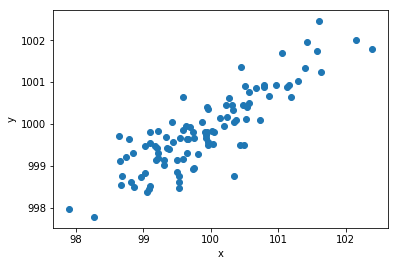

In [53]:
rng = np.random.RandomState(1234)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
np.corrcoef(np.vstack([x, y]))

array([[1.        , 0.86185213],
       [0.86185213, 1.        ]])

### 1. Least-squares linear regression via Maximum Likelihood Estimation

- using MLE estimators:

$w = \frac{\sigma_{x,y}}{\sigma_{x}^{2}}$

$b = \bar{y} - w\bar{x}$

where 


$\text{covariance: } \sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

$\text{variance: } \sigma^{2}_{x} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

**Optional exercise:** It is possible to derive the above estimators using maximum likelihood estimation. As an exercise, derive the above equations for w and b, using the following pieces of information:

- y values can be expressed in terms of x values, plus an error: $Y = XW + \varepsilon$ (or: $y = wx + b + \varepsilon$)
- Errors $\varepsilon$ can be modeled as drawn i.i.d. (independent and identically distributed) from a normal distribution with mean zero. Or: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$
    - See [here](https://en.wikipedia.org/wiki/Normal_distribution) for the normal distribution's PDF.
- Therefore, you can think of errors as being a *function* of the slope/intercept parameters (W = [w, b]): $\varepsilon = Y - XW = y - wx - b$
- The likelihood we are maximising is the probability of generating the set of errors $\varepsilon$ given the parameters $\theta = (w, b)$.
- In this case (when using a normal distribution), working with the log-likelihood simplifies matters.
- The definitions of variance and covariance will eventually be helpful here (see the Probability and Statistics I tutorial).

This is a fairly lengthy derivation. If you like, you can skip it and just use the equations for w and b given above to fill out the following function:

In [55]:
# TODO: Implement Least square linear regression via MLE given the estimators
# Note: You could use numpy functions if you wish (e.g. np.cov())
mean_x = np.mean(x)
mean_y = np.mean(y)

cov = (x - mean_x).dot(y - mean_y) # dividing by n not needed as it will be in both numerator
var = (x - mean_x).dot(x - mean_x) # and denominator.

w1 = cov / var
b1 = mean_y - w1*mean_x

print('slope: {}'.format(w1))
print('y-intercept: {}'.format(b1))

slope: 0.9395464061992607
y-intercept: 905.9752441954497


### 2. Least-squares linear regression via Ordinary Least Squares

- closed-form (analytical) solution:

$$w = (X^T X)^{-1} X^T y$$

In [62]:
# Implement Least-square linear regression via OLS estimation

xmat = np.matrix([np.ones(x.size), x]).T
ymat = np.matrix(y).T
w = np.linalg.inv(xmat.T.dot(xmat)).dot(xmat.T).dot(ymat)
w2, b2 = w[1, 0], w[0, 0]

print('slope: {}'.format(w2))
print('y-intercept: {}'.format(b2))

slope: 0.9395464062110506
y-intercept: 905.9752441913424


### 3. Using a pre-implemented function

In [65]:
# Use numpy functions for fitting linear regression, e.g. np.polyfit()
fit = np.polyfit(x, y, 1)
w3, b3 = fit[0], fit[1]
print('slope: {}'.format(w3))
print('y-intercept: {}'.format(b3))

slope: 0.9395464061992634
y-intercept: 905.9752441954485


- note that there are many alternative tools (sklearn, PyTorch...)

### Show line fit

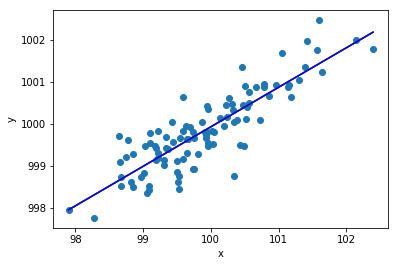

In [66]:
endpts = np.array([np.min(x), np.max(x)])
predict1 = endpts*w1 + b1
predict2 = endpts*w2 + b2
predict3 = endpts*w3 + b3


plt.plot(x, y, marker='o', linestyle='')
plt.plot(endpts, predict1, color='r')
plt.plot(endpts, predict2, color='g')
plt.plot(endpts, predict3, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Evaluate

#### Mean squared error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

- note that MSE is scale-dependent

In [69]:
# TODO: compute the MSE for all three models
diff1 = y - (w1*x + b1)
diff2 = y - (w2*x + b2)
diff3 = y - (w3*x + b3)
print('MSE 1: {}'.format(np.square(diff1).mean()))
print('MSE 2: {}'.format(np.square(diff2).mean()))
print('MSE 3: {}'.format(np.square(diff3).mean()))

MSE 1: 0.22370717363794881
MSE 2: 0.22370717363795184
MSE 3: 0.22370717363794893


#### Residuals

\begin{equation}
\epsilon = Y - \hat{Y}
\end{equation}

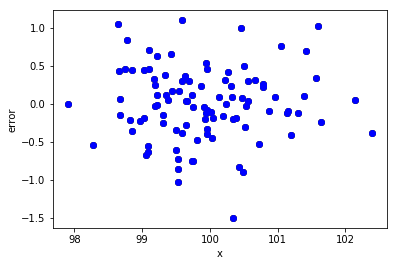

In [70]:
# TODO: plot the residuals for the three models with respect to the true data
plt.plot(x, diff1, marker='o', linestyle='', color='r')
plt.plot(x, diff2, marker='o', linestyle='', color='g')
plt.plot(x, diff3, marker='o', linestyle='', color='b')
plt.xlabel('x')
plt.ylabel('error')
plt.show()

Note that many more statistics can be used to quantify the performance of the models, e.g. Coefficient of determination ($R^2$) (https://en.wikipedia.org/wiki/Coefficient_of_determination)